In [1]:
import matplotlib.pyplot  as plt
import numpy as np
import pickle
import os
root = "/home/trungdc/unimelb/MAST30024/asm/mast30034_2021_s2_assignment_1_1-alexdang02-1/"
plot_dir = os.path.join(root, "Plots")
save_dir = os.path.join(root, "Resources")

In [2]:
def import_pickle(file_name):
    with open(os.path.join(save_dir, f"{file_name}.pkl"),'rb') as f:
        output = pickle.load(f)
    f.close()
    return output
spacial_noise = import_pickle("spacial_noise")
temporal_noise = import_pickle("temporal_noise")
TC = import_pickle("TC").T
SM = import_pickle("SM")
X = import_pickle("X")
print(f"Size of spacial_noise {spacial_noise.shape}")
print(f"Size of temporal_noise {temporal_noise.shape}")
print(f"Size of TC {TC.shape}")
print(f"Size of SM {SM.shape}") 
print(f"Size of X {X.shape}") 

Size of spacial_noise (6, 441)
Size of temporal_noise (240, 6)
Size of TC (6, 240)
Size of SM (6, 441)
Size of X (240, 441)


In [3]:
T_s = import_pickle("spacial_noise")
T_t = import_pickle("temporal_noise")
TC = import_pickle("TC")
SM = import_pickle("SM")
X = import_pickle("X")

In [4]:
A_lsr = np.matmul( np.linalg.inv( np.matmul( TC.T, TC)), np.matmul(TC.T, X)) 
D_lsr = np.matmul(X, A_lsr.T)
print(f"Size of A_lsr {A_lsr.shape}") 
print(f"Size of D_lsr {D_lsr.shape}") 

Size of A_lsr (6, 441)
Size of D_lsr (240, 6)


In [5]:
def plot_SM(tmpSM):
    fig, axes = plt.subplots(3, 2)
    fig.set_size_inches(9, 12)
    count = 0
    for ax in axes.flat:
        im = ax.imshow(np.reshape(A_lsr[count], (21,21), order='C'),cmap='autumn' )
        ax.set_title(f"SM {count+1}")
        count += 1
        if count == 6:
            break
    fig.colorbar(im, ax=axes.ravel().tolist())
    plt.title("Plot of six SMs")
    fig.savefig(os.path.join(plot_dir, "D.png"))
    plt.close()
plot_SM(A_lsr)

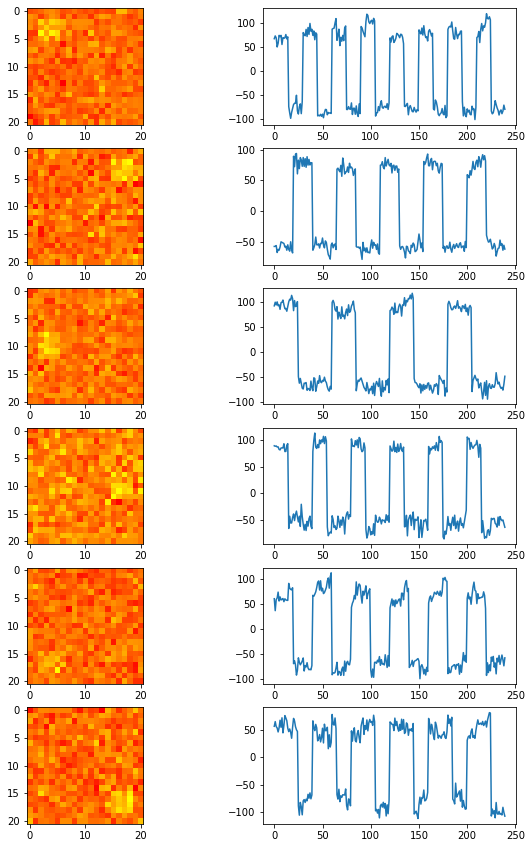

In [6]:
fig, axes = plt.subplots(6, 2)
fig.set_size_inches(10, 15)
count = 0
for count in range(6):
    im = axes[count][0].imshow(np.reshape(A_lsr[count], (21,21), order='C'),cmap='autumn' )
    im = axes[count][1].plot(D_lsr.T[count])
    # ax.set_title(f"SM {count+1}")
    # count += 1
    # if count == 6:
        # break
# plt.title("Plot of six SMs")
fig.savefig(os.path.join(plot_dir, "E.png"))
plt.show()

## Question 2.2

In [7]:
alpha = 0.1 * X.shape[1]
A_rr = np.matmul( np.linalg.inv(np.add(np.matmul(TC.T, TC), np.ones((TC.shape[1], TC.shape[1])) * alpha)) , np.matmul(TC.T, X))
print(f"Shape of A_rr: {A_rr.shape}")
D_rr = np.matmul(X, A_rr.T)
print(f"Shape of D_rr: {D_rr.shape}")

Shape of A_rr: (6, 441)
Shape of D_rr: (240, 6)


In [8]:
C_tlsr = np.corrcoef(TC.T, D_lsr.T)
C_trr = np.corrcoef(TC.T, D_rr.T)
C_tlsr.shape

(12, 12)

In [13]:
C_tlsr.sum() - C_trr.sum()

13.804763764309957